In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. Load Data

In [2]:
loan = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/loan/loan_table.csv')
borrower = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/loan/borrower_table.csv')

In [3]:
loan.head(3)

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN


In [4]:
loan.rename(columns={'loan_purpose':'purpose',
                     'loan_granted':'granted',
                     'loan_repaid':'repaid'},inplace=True)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   loan_id  101100 non-null  int64  
 1   purpose  101100 non-null  object 
 2   date     101100 non-null  object 
 3   granted  101100 non-null  int64  
 4   repaid   47654 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


In [6]:
loan['date'] = pd.to_datetime(loan['date'])

In [7]:
for column in loan.columns:
    uniques = loan[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

loan_id              101100	 [ 19454 496811 929493 580653 172419]
purpose                  5	 ['investment' 'other' 'business' 'emergency_funds' 'home']
date                   260	 ['2012-03-15T00:00:00.000000000' '2012-01-17T00:00:00.000000000'
 '2012-02-09T00:00:00.000000000' '2012-06-27T00:00:00.000000000'
 '2012-05-21T00:00:00.000000000']
granted                  2	 [0 1]
repaid                   3	 [nan  1.  0.]


In [8]:
borrower.head(3)

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8


In [9]:
borrower.rename(columns={'is_first_loan':'is_first',
                         'fully_repaid_previous_loans':'repay_prev',
                         'currently_repaying_other_loans':'paying_others',
                         'total_credit_card_limit':'credit_limit',
                         'avg_percentage_credit_card_limit_used_last_year':'credit_used',
                         'saving_amount':'saving',
                         'checking_amount':'checking',
                         'yearly_salary':'salary',
                         'dependent_number':'n_depends'},inplace=True)

In [10]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   loan_id        101100 non-null  int64  
 1   is_first       101100 non-null  int64  
 2   repay_prev     46153 non-null   float64
 3   paying_others  46153 non-null   float64
 4   credit_limit   101100 non-null  int64  
 5   credit_used    94128 non-null   float64
 6   saving         101100 non-null  int64  
 7   checking       101100 non-null  int64  
 8   is_employed    101100 non-null  int64  
 9   salary         101100 non-null  int64  
 10  age            101100 non-null  int64  
 11  n_depends      101100 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 9.3 MB


In [11]:
for column in borrower.columns:
    uniques = borrower[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

loan_id              101100	 [289774 482590 135565 207797 828078]
is_first                 2	 [1 0]
repay_prev               3	 [nan  1.  0.]
paying_others            3	 [nan  0.  1.]
credit_limit           125	 [8000 4500 6900 1200 6100]
credit_used            111	 [0.49 1.03 0.82 0.8  0.53]
saving                6845	 [3285  636 2085  358 2138]
checking              9653	 [1073 5299 3422 3388 4282]
is_employed              2	 [0 1]
salary                 834	 [    0 13500 24500 18100 29500]
age                     62	 [47 33 38 24 36]
n_depends                9	 [3 1 8 2 7]


In [12]:
numerical_features = ['credit_limit', 'credit_used', 
                      'saving', 'checking', 'salary', 'age', 'n_depends']
borrower[numerical_features].describe()

,credit_limit,credit_used,saving,checking,salary,age,n_depends
count,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000
mean,4112.743818,0.724140,1799.617616,3177.150821,21020.727992,41.491632,3.864748
std,2129.121462,0.186483,1400.545141,2044.448155,18937.581415,12.825570,2.635491
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,2700.000000,0.600000,834.000000,1706.000000,0.000000,32.000000,2.000000
50%,4100.000000,0.730000,1339.000000,2673.000000,21500.000000,41.000000,3.000000
75%,5500.000000,0.860000,2409.000000,4241.000000,35300.000000,50.000000,6.000000
max,13500.000000,1.090000,10641.000000,13906.000000,97200.000000,79.000000,8.000000


In [13]:
data = pd.merge(left = loan, right = borrower, how = 'inner', left_on = 'loan_id', right_on = 'loan_id')

In [14]:
data.head(2)

,loan_id,purpose,date,granted,repaid,is_first,repay_prev,paying_others,credit_limit,credit_used,saving,checking,is_employed,salary,age,n_depends
0,19454,investment,2012-03-15,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,2012-01-17,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5


## 2. Feature Engineering and Visualization

In [15]:
train_data = data[data.granted == 1]

### 2.1 Loan Purpose Analysis

<AxesSubplot:xlabel='purpose', ylabel='repaid'>

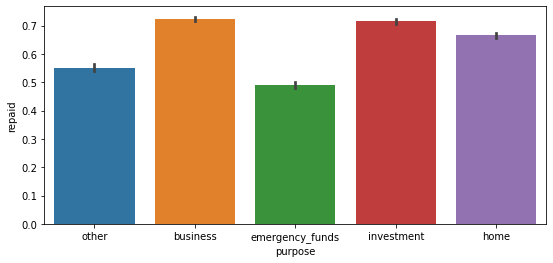

In [16]:
fig, ax = plt.subplots(figsize = (9, 4))

sns.barplot(data = train_data, x = 'purpose', y = 'repaid', estimator = np.mean)

Business loan and investment loan are more likely to be repaid, then home is the next. Emergency funds and other purpose loans have the lowest possibility of repayment.

### 2.2 Loan History Analysis

'is_first_loan' or not, 'fully_repaid_previous_loans' or not and 'currently_repaying_other_loans' represent the borrower's Loan history, which can be taken as an important aspect to predict if he/she will repay the loan or not. 

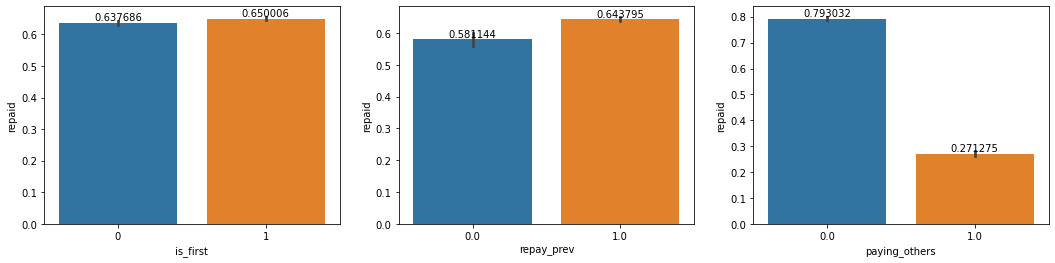

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (18, 4))

sns.barplot(data = train_data, x = 'is_first', y = 'repaid', estimator = np.mean, ax =ax[0])
   
sns.barplot(data = train_data[train_data.is_first == 0], x = 'repay_prev', y = 'repaid', estimator = np.mean, ax =ax[1])

sns.barplot(data = train_data[train_data.is_first == 0], x = 'paying_others', y = 'repaid', estimator = np.mean, ax =ax[2])

for i in range(3):
    for j in ax[i].containers:
        ax[i].bar_label(j,)

The 3 barplots above indicate that:

1) There is no significant difference in loan repayment rate between first loan borrowers and previous borrowers.

2) For previous users, if he/she has repaid the previous loan, it will be more possible to pay this loan again.

3) For previous users, if he/she is currently repaying other loans, it will be less likely for him to pay this loan.

### 2.3 Credit History Analysis

<AxesSubplot:xlabel='credit_used', ylabel='repaid'>

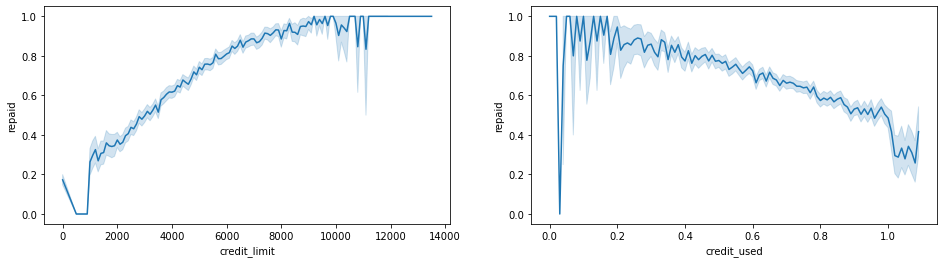

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

sns.lineplot(data = train_data, x = 'credit_limit', y = 'repaid', estimator = np.mean, ax =ax[0])
   
sns.lineplot(data = train_data, x = 'credit_used', y = 'repaid', estimator = np.mean, ax =ax[1])

Borrowers with a higher total_credit_card_limit are more likely to repay the loan, especially with a credit limit greater than 9000.

Borrowers with a higher level of 'avg_percentage_credit_card_limit_used_last_year' are less likely to repay the loan, especially when they exceeded the total credit limit.

### 2.4 Saving & Checking History Analysis

<AxesSubplot:xlabel='checking', ylabel='repaid'>

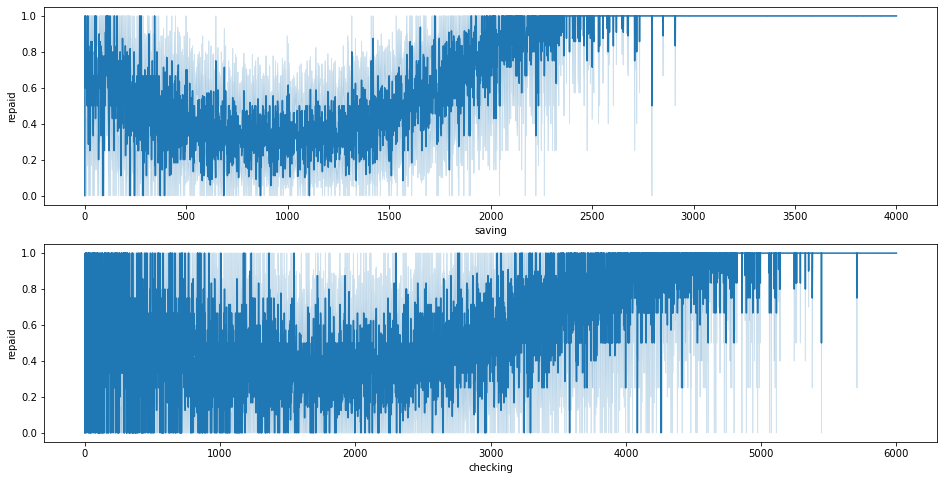

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (16, 8))

sns.lineplot(data = train_data[train_data.saving <= 4000], x = 'saving', y = 'repaid', estimator = np.mean, ax =ax[0])
   
sns.lineplot(data = train_data[train_data.checking <= 6000], x = 'checking', y = 'repaid', estimator = np.mean, ax =ax[1])

### 2.5 Demography Background Analysis

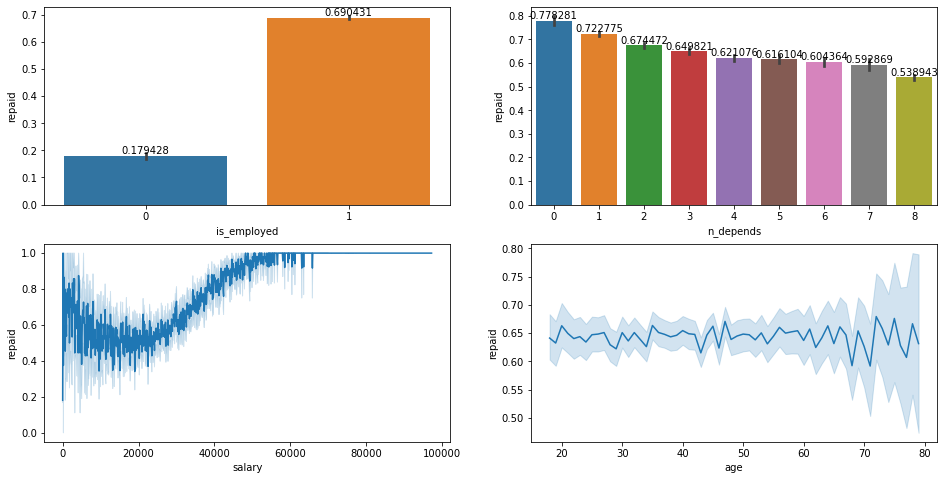

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (16, 8))

sns.barplot(data = train_data, x = 'is_employed', y = 'repaid', estimator = np.mean, ax =ax[0][0])

sns.barplot(data = train_data, x = 'n_depends', y = 'repaid', estimator = np.mean, ax =ax[0][1])

sns.lineplot(data = train_data, x = 'salary', y = 'repaid', estimator = np.mean, ax =ax[1][0])

sns.lineplot(data = train_data, x = 'age', y = 'repaid', estimator = np.mean, ax =ax[1][1])

for i in range(2):
    for j in ax[0][i].containers:
        ax[0][i].bar_label(j,)

1) Employed borrowers are more likely to repay the loan.

2) The more depends the borrower has, the less likely they will repay the loan.

3) The repay rate for borrowers with a salary less than 20000 decreases as salary increase. When the salary higher than 20000, the pay rate starts to increase

4) The repay rates among different age groups don't show significant difference.

### 2.6 Features' Correlation Analysis

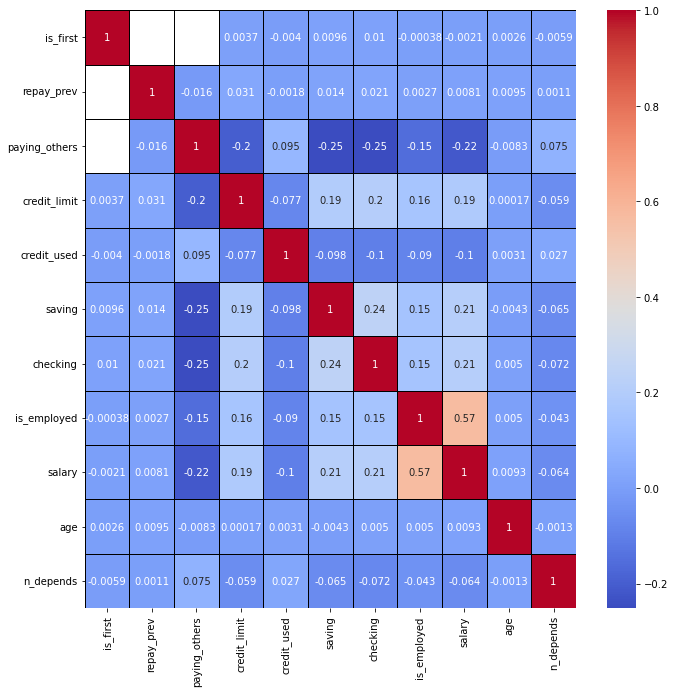

In [21]:
corr_features = ['is_first', 'repay_prev', 'paying_others', 'credit_limit', 'credit_used', 'saving', 'checking',
       'is_employed', 'salary', 'age', 'n_depends']
corr_matrix = train_data[corr_features].corr()
plt.figure(figsize = (11, 11))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linecolor = 'black', 
            linewidths = 1.0, xticklabels = True, yticklabels = True)
plt.show()

1. As we can see from various plots above, features including 'paying_others', 'credit_limit', 'saving', 'checking', 'is_employed', 'salary' show obvious correlation with granting of loan.


2. [is_first, repay_prev], [is_first, paying_others]  are blank

   This is because if this is the first loan, 'repay_prev' and 'paying_others' are set to Nan. This may cause some information redundancy. We can set Nan in 'repay_prev' and 'paying_others' as -1 and then eliminate the feature 'is_first'.


3. Besides, we notice that there exist high correlation between feature pairs :

   1) [credit_limit, saving], [credit_limit, checking], [credit_limit, is_employed], [credit_limit, salary]

   This is because if the borrower has job, and his saving and checking account would have a high amount with high salary. As the result, his credit_limit would also be high.
   
   2) [salary, is_employed]

   This is because only if the borrower is employed, would his salary greater than 0
   Therefore, we can eliminate the feature 'is_employed' to reduce  redundancy.

In [22]:
data['repay_prev'] = data['repay_prev'].fillna(-1)
data['paying_others'] = data['paying_others'].fillna(-1)
data['credit_used'] = data['credit_used'].fillna(0)
train_data['repay_prev'] = train_data['repay_prev'].fillna(-1)
train_data['paying_others'] = train_data['paying_others'].fillna(-1)
train_data['credit_used'] = data['credit_used'].fillna(0)

## 3. Model Fitting

In [23]:
### 3.1 Data Processing

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [25]:
data = pd.get_dummies(data = data, columns = ['purpose'])
train_data = pd.get_dummies(data = train_data, columns = ['purpose'])

In [27]:
features = ['repay_prev','paying_others', 'credit_limit', 'credit_used', 
            'saving', 'checking','salary', 'age', 'n_depends', 
            'purpose_business','purpose_emergency_funds', 'purpose_home', 
            'purpose_investment','purpose_other']
X = train_data[features]
y = train_data['repaid']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2,random_state = 1)

### 3.2 Model Fitting

In [29]:
rf_reg = RandomForestClassifier(max_features=4)
rf_reg.fit(X_train, y_train)

RandomForestClassifier(max_features=4)

In [30]:
model = rf_reg
train_con_matrix = confusion_matrix(y_train, model.predict(X_train))
print('train matrix: \n', train_con_matrix)
print('train accuracy:', round(accuracy_score(y_train, model.predict(X_train)),4))

test_con_matrix = confusion_matrix(y_test, model.predict(X_test))
print('\n test matrix: \n', test_con_matrix)
print('test accuracy:', round(accuracy_score(y_test, model.predict(X_test)), 4))

train matrix: 
 [[13532     0]
 [    0 24591]]
train accuracy: 1.0

 test matrix: 
 [[3116  300]
 [ 471 5644]]
test accuracy: 0.9191


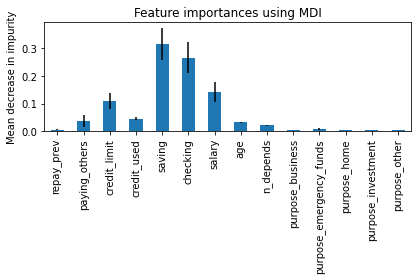

In [31]:
import time
rf_reg_importances = pd.Series(rf_reg.feature_importances_, index=features)
std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
elapsed_time = time.time()

fig, ax = plt.subplots()
rf_reg_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 3.3 Model Prediction & Evaluation

Calculate profitability using bank's model

In [32]:
loan_test = train_data.loc[y_test.index,:]

print('number of repaid \n', sum(loan_test.repaid == 1))
print('number of not repaid \n', sum(loan_test.repaid == 0))
print("Profitability using bank's model: \n", sum(loan_test.repaid == 1) - sum(loan_test.repaid == 0))

number of repaid 
 6115
number of not repaid 
 3416
Profitability using bank's model: 
 2699


Calculate profitability using new model

In [33]:
loan_test['new_model'] = model.predict(X_test)

print('number of granted and repaid \n', sum(loan_test['new_model']*loan_test['repaid'] == 1))
print('number of granted but not repaid \n', sum(loan_test['new_model'] - loan_test['repaid'] == 1))

print("Profitability using new model: \n",sum(loan_test['new_model']*loan_test['repaid'] == 1) - sum(loan_test['new_model'] - loan_test['repaid'] == 1))

number of granted and repaid 
 5644
number of granted but not repaid 
 300
Profitability using new model: 
 5344
